In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:

# Charger dataset 
df = pd.read_csv("../data/water_potability.csv")
# Vérifier les 5 premières lignes
df.head()
# Taille du dataset
print("Shape:", df.shape)
# Types de données et valeurs manquantes
df.info()
# Statistiques de base
df.describe()



Shape: (3276, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [4]:
# Count les val manquantes par colonne
df.isnull().sum()


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

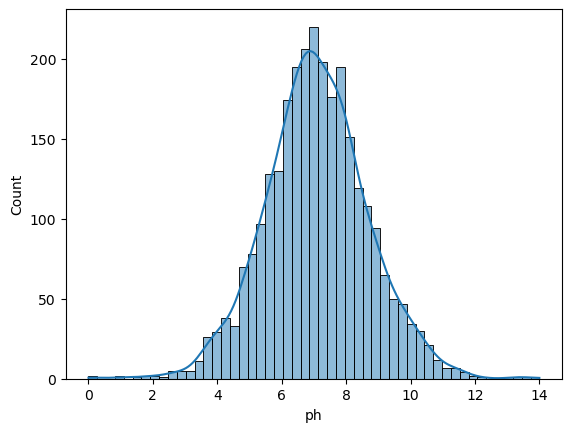

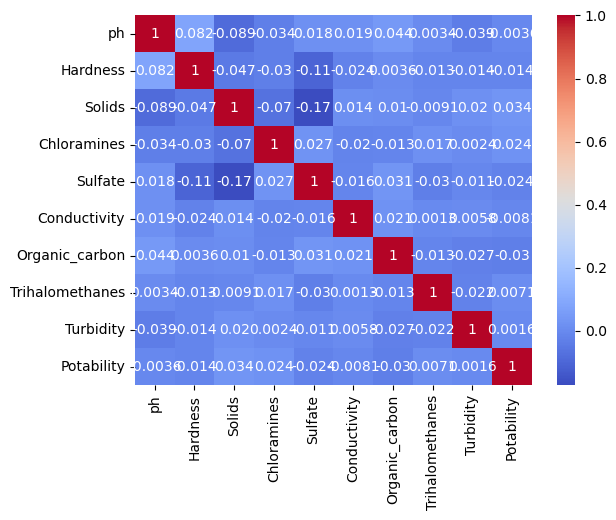

In [5]:

# Distribution de pH
sns.histplot(df['ph'], kde=True)
plt.show()

# Heatmap pour voir corrélation
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


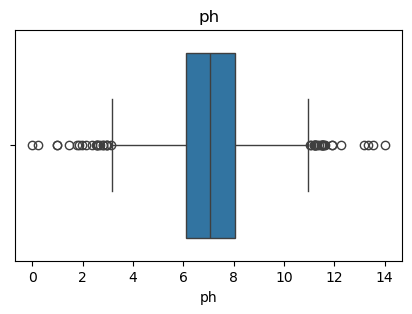

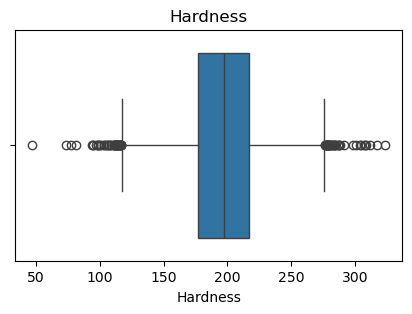

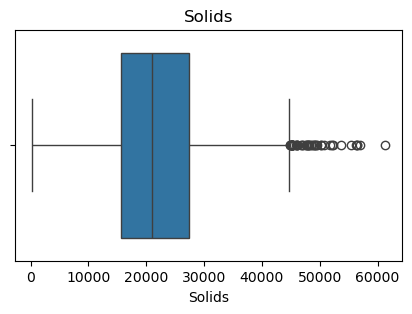

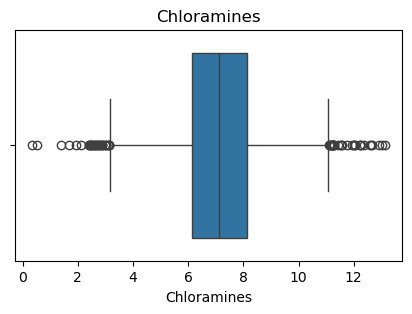

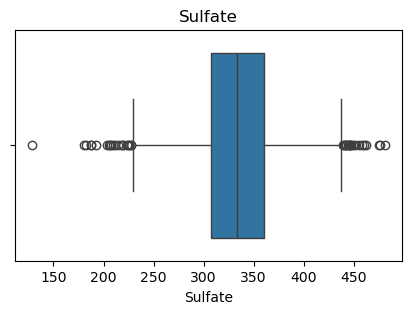

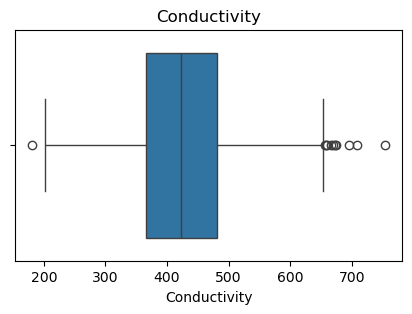

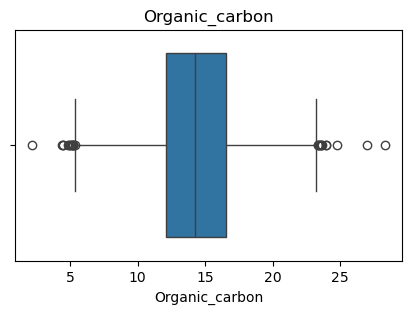

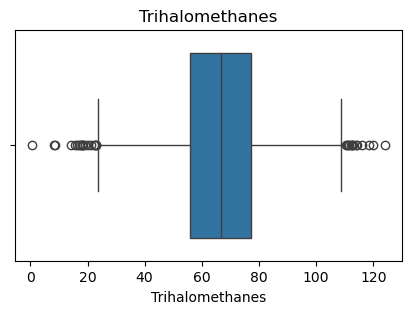

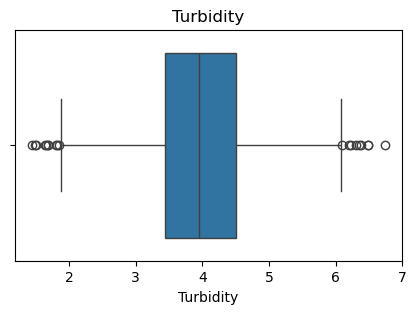

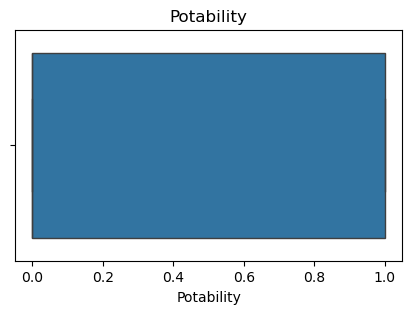

In [7]:
# this is etape 2 normalement or actually we could include it dans etape 1 ( a savoir apres )
# visualisation des outiliers 
for col in df.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


In [9]:
# hana on est entraine de faire le traitement de val manquantes on remplace sulfate et ph par mediane then trihalm.. par la moyenne 
df.fillna({
    'ph': df['ph'].median(),
    'Sulfate': df['Sulfate'].median(),
    'Trihalomethanes': df['Trihalomethanes'].mean()
}, inplace=True)


In [13]:
# checking for les val manquantes  le count est full 3276 are full 
df.describe()



,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [14]:
# another check to see ida mzel les val manquantes et voiiiila on a pas tt est a zero
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [15]:
# now detection des outiliers  hna 3ndna les val numeriques mo9bil drna hdek boxplot actually are the same 
def detect_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers.shape[0]

for col in df.columns[:-1]:  # exclure Potability
    print(col, ":", detect_outliers_iqr(col), "outliers")


ph : 142 outliers
Hardness : 83 outliers
Solids : 47 outliers
Chloramines : 61 outliers
Sulfate : 264 outliers
Conductivity : 11 outliers
Organic_carbon : 25 outliers
Trihalomethanes : 54 outliers
Turbidity : 19 outliers


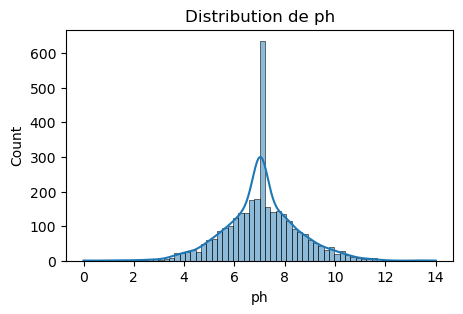

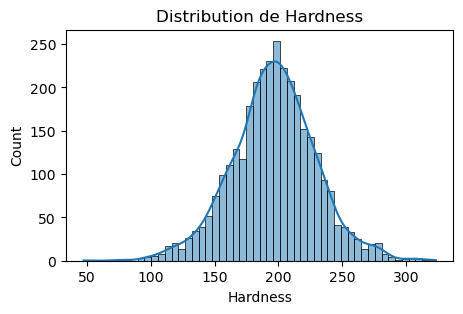

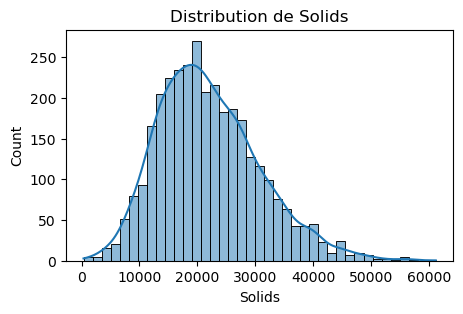

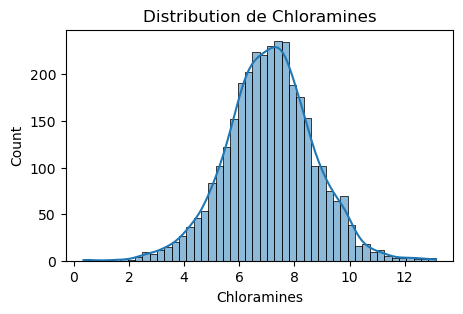

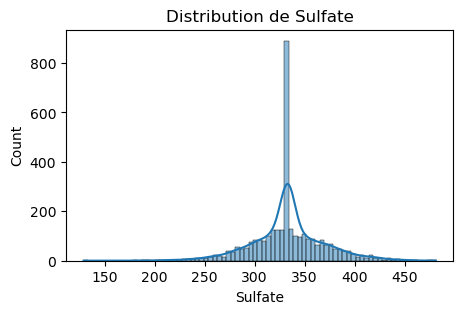

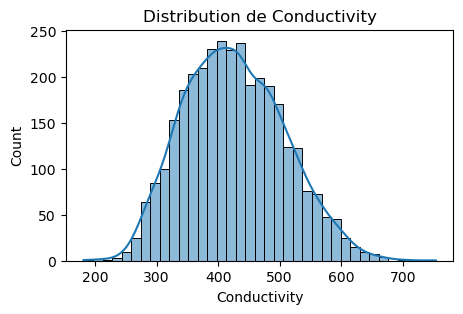

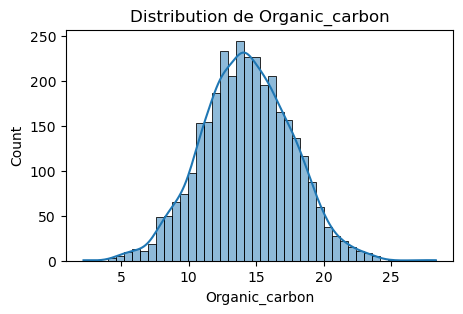

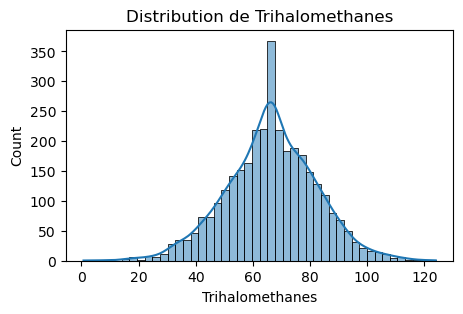

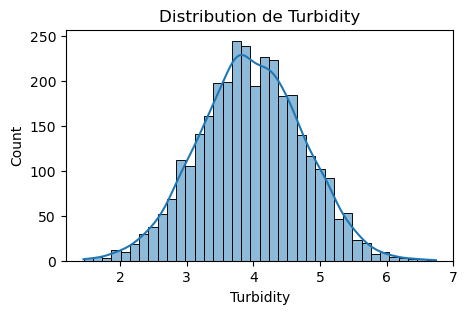

In [16]:
# here we have visualisation des distributions 
for col in df.columns[:-1]:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.show()


In [17]:
# comparaison potable vs non potable 
df.groupby('Potability').mean()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.077736,196.733292,21777.490788,7.092175,334.200184,426.730454,14.364335,66.308522,3.965800
1,7.068655,195.800744,22383.991018,7.169338,332.683125,425.383800,14.160893,66.533513,3.968328


In [20]:
# here we are just puting hadok les images de graphes heatmap w ge3 dans un folder results 
import os
import matplotlib.pyplot as plt
import seaborn as sns

GRAPHS_DIR = "../results/graphs"  
os.makedirs(GRAPHS_DIR, exist_ok=True)

#  Boxplots + histogrammes pour toutes les colonnes sauf Potability
for col in df.columns[:-1]:
    # Boxplot
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot {col}")
    plt.savefig(os.path.join(GRAPHS_DIR, f"boxplot_{col}.png"), dpi=300, bbox_inches='tight')
    plt.close()
    
    # Histogramme + KDE
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogramme {col}")
    plt.savefig(os.path.join(GRAPHS_DIR, f"hist_{col}.png"), dpi=300, bbox_inches='tight')
    plt.close()

#  Heatmap de corrélation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap correlation")
plt.savefig(os.path.join(GRAPHS_DIR, "heatmap_correlation.png"), dpi=300, bbox_inches='tight')
plt.close()




In [21]:
# here on commence letape 3 de pretraitement 
# on doit separer tt dabord les données en x et y 
# X = features (toutes les colonnes sauf Potability)
X = df.drop("Potability", axis=1)
# y = label
y = df["Potability"]


In [22]:
# now pour la normalisation des data we use  standarscalar i think it would help us to do svm et ann 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [23]:
# hna la division des données 20% te3 test et 80% te3 entrainement 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
# un petit check si tt va bien 
print("Shape X_train:", X_train.shape)
print("Shape X_test :", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test :", y_test.shape)


Shape X_train: (2620, 9)
Shape X_test : (656, 9)
Shape y_train: (2620,)
Shape y_test : (656,)


In [18]:

# Libraries & Load Data

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv("data/water_potability.csv")

# Inspect data
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [19]:

#  Handle Missing Values

df = df.dropna().reset_index(drop=True)

# Features (exclude target if present)
X = df.drop(columns=["Potability"], errors='ignore')

In [20]:

#  Scale Features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:

#  PCA Before Clustering
pca = PCA(n_components=0.9, random_state=0)
X_pca_reduced = pca.fit_transform(X_scaled)
print(f"Original features: {X_scaled.shape[1]}, Reduced features: {X_pca_reduced.shape[1]}")

Original features: 9, Reduced features: 8


Best k according to Elbow Method: 3
Best k according to Silhouette Score: 2
Best k according to Calinski-Harabasz Index: 2


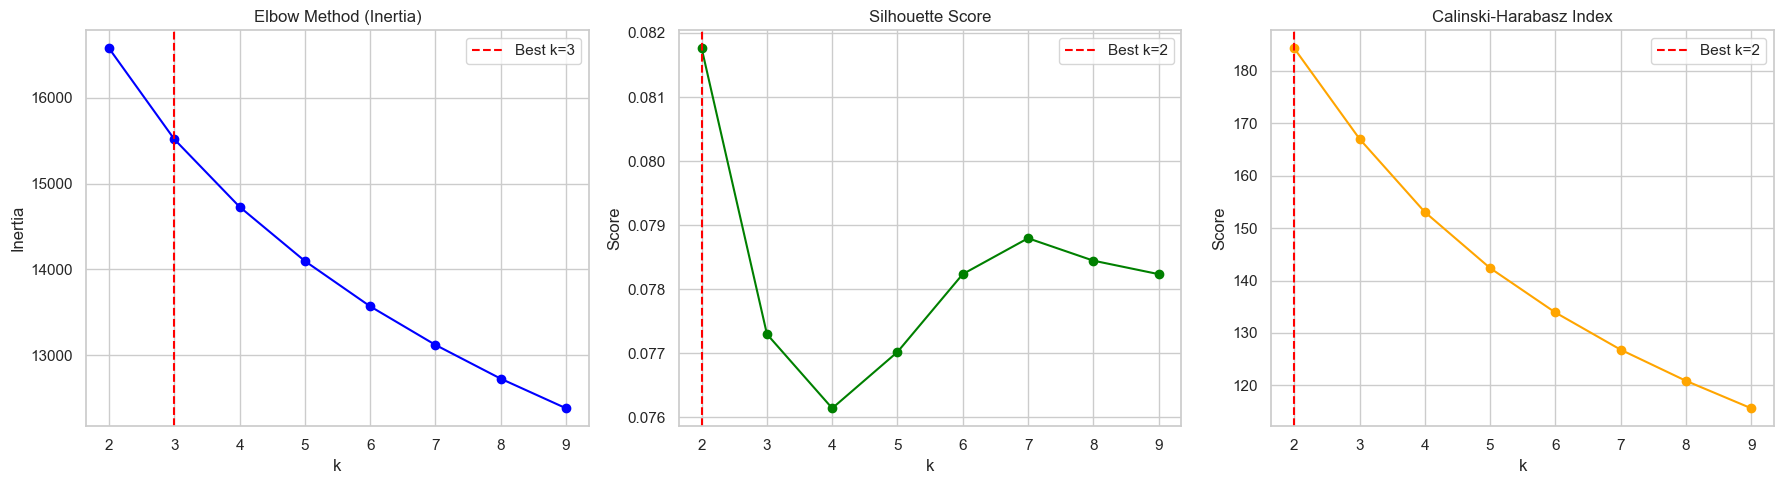

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Range of k values to test
k_range = range(2, 10)

# Lists to store metrics
inertias = []
sil_scores = []
ch_scores = []

# Compute metrics
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=50)
    labels = kmeans.fit_predict(X_scaled)
    
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))
    ch_scores.append(calinski_harabasz_score(X_scaled, labels))

# Determine best k for each metric
inertia_drops = [inertias[i-1] - inertias[i] for i in range(1, len(inertias))]
best_k_elbow = k_range[inertia_drops.index(max(inertia_drops)) + 1]
best_k_silhouette = k_range[sil_scores.index(max(sil_scores))]
best_k_ch = k_range[ch_scores.index(max(ch_scores))]

print("Best k according to Elbow Method:", best_k_elbow)
print("Best k according to Silhouette Score:", best_k_silhouette)
print("Best k according to Calinski-Harabasz Index:", best_k_ch)

# Optional: put metrics in a DataFrame
comparison_df = pd.DataFrame({
    "k": list(k_range),
    "Inertia": inertias,
    "Silhouette": sil_scores,
    "Calinski-Harabasz": ch_scores
})


plt.figure(figsize=(18,5))

# Inertia (Elbow)
plt.subplot(1,3,1)
plt.plot(k_range, inertias, marker='o', color='blue')
plt.title("Elbow Method (Inertia)")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.axvline(best_k_elbow, color='red', linestyle='--', label=f"Best k={best_k_elbow}")
plt.legend()

# Silhouette
plt.subplot(1,3,2)
plt.plot(k_range, sil_scores, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("k")
plt.ylabel("Score")
plt.axvline(best_k_silhouette, color='red', linestyle='--', label=f"Best k={best_k_silhouette}")
plt.legend()

# Calinski-Harabasz
plt.subplot(1,3,3)
plt.plot(k_range, ch_scores, marker='o', color='orange')
plt.title("Calinski-Harabasz Index")
plt.xlabel("k")
plt.ylabel("Score")
plt.axvline(best_k_ch, color='red', linestyle='--', label=f"Best k={best_k_ch}")
plt.legend()

plt.tight_layout()
plt.show()


In [24]:
# K-means with 2 clusters (best k from metrics)
k_final = 2
kmeans = KMeans(n_clusters=k_final, random_state=0, n_init=50)
clusters = kmeans.fit_predict(X_pca_reduced ) 

# Add cluster labels
df["Cluster"] = clusters



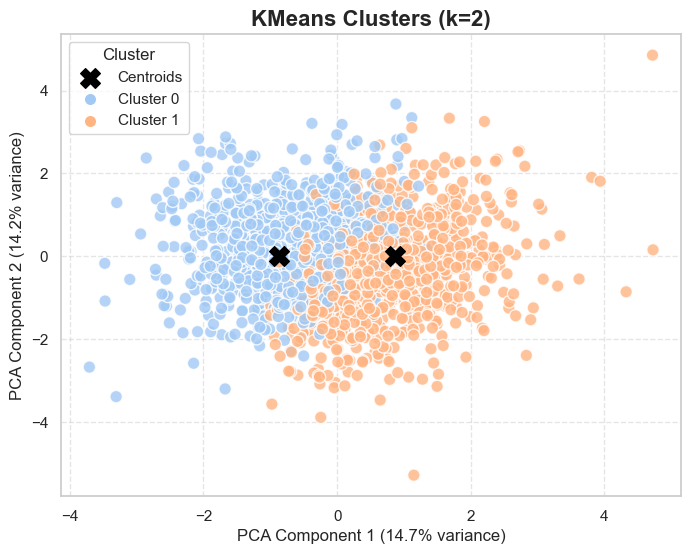

Graph saved at: ../results/graphs\KMeans_2_Clusters_PCA.png


In [25]:

#  2D PCA Visualization

# PCA for 2D plot
X_plot = PCA(n_components=2, random_state=0).fit_transform(X_pca_reduced)
explained_var = PCA(n_components=2).fit(X_pca_reduced).explained_variance_ratio_ * 100


cluster_labels = df["Cluster"].unique()
palette = sns.color_palette("pastel", n_colors=len(cluster_labels))
colors = [palette[label] for label in df["Cluster"]]

plt.figure(figsize=(8,6))
plt.scatter(
    X_plot[:,0],
    X_plot[:,1],
    c=colors,
    s=80,
    alpha=0.8,
    edgecolor='w'
)

# Plot centroids
centroids_2d = PCA(n_components=2, random_state=0).fit_transform(kmeans.cluster_centers_)
plt.scatter(centroids_2d[:,0], centroids_2d[:,1], s=200, c='black', marker='X', label='Centroids')

plt.title(f"KMeans Clusters (k={k_final})", fontsize=16, weight='bold')
plt.xlabel(f"PCA Component 1 ({explained_var[0]:.1f}% variance)")
plt.ylabel(f"PCA Component 2 ({explained_var[1]:.1f}% variance)")


for i, label in enumerate(cluster_labels):
    plt.scatter([], [], color=palette[i], label=f"Cluster {label}", s=80, edgecolor='w')
plt.legend(title="Cluster", loc="best")

plt.grid(True, linestyle='--', alpha=0.5)

# Save figure
folder_path = "../results/graphs"
os.makedirs(folder_path, exist_ok=True)
file_path = os.path.join(folder_path, f"KMeans_{k_final}_Clusters_PCA.png")
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"Graph saved at: {file_path}")

In [26]:

#  Cluster Summary

cluster_summary = df.groupby("Cluster").mean()
display(cluster_summary)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
Cluster,,,,,,,,,,
0,7.731577,210.381955,18054.393456,7.009974,342.165832,423.261524,15.032870,62.016718,3.797165,0.383603
1,6.462490,182.047332,25648.322453,7.254448,324.589416,429.679592,13.705648,70.635005,4.136389,0.422287


Confusion matrix:
 [[609 591]
 [379 432]]

Purity: 0.5967180507210343

Cluster composition:
 Potability    0    1
Cluster             
0           609  379
1           591  432


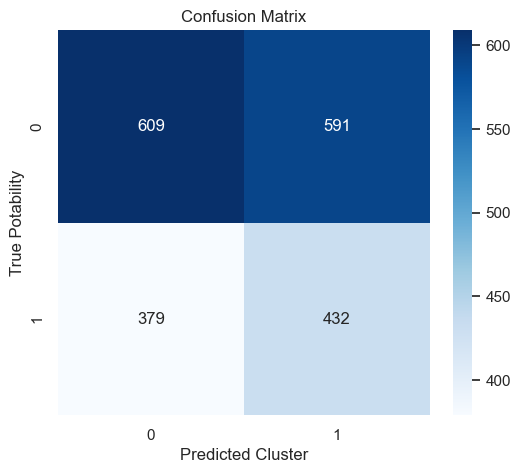

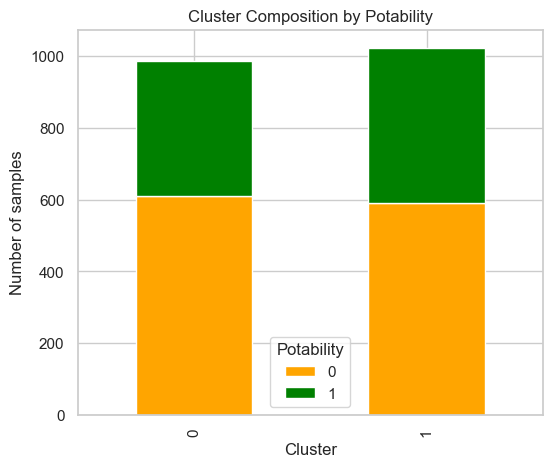

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


y_true = df["Potability"]  # actual potability labels
y_pred = df["Cluster"]     # cluster labels from KMeans or GMM

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion matrix:\n", cm)


# Purity calculation
# Purity = sum of the largest class in each cluster / total samples
correct = np.sum(np.max(cm, axis=0))
total = np.sum(cm)
purity = correct / total
print("\nPurity:", purity)


# Cluster composition summary

summary = df.groupby("Cluster")["Potability"].value_counts().unstack().fillna(0)
print("\nCluster composition:\n", summary)

#  Confusion matrix heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Cluster')
plt.ylabel('True Potability')
plt.title('Confusion Matrix')
plt.show()

# Cluster composition bar plot
summary.plot(kind='bar', stacked=True, figsize=(6,5), color=['orange','green'])
plt.xlabel('Cluster')
plt.ylabel('Number of samples')
plt.title('Cluster Composition by Potability')
plt.legend(title='Potability')
plt.show()


1) Optimisation de K pour KNN


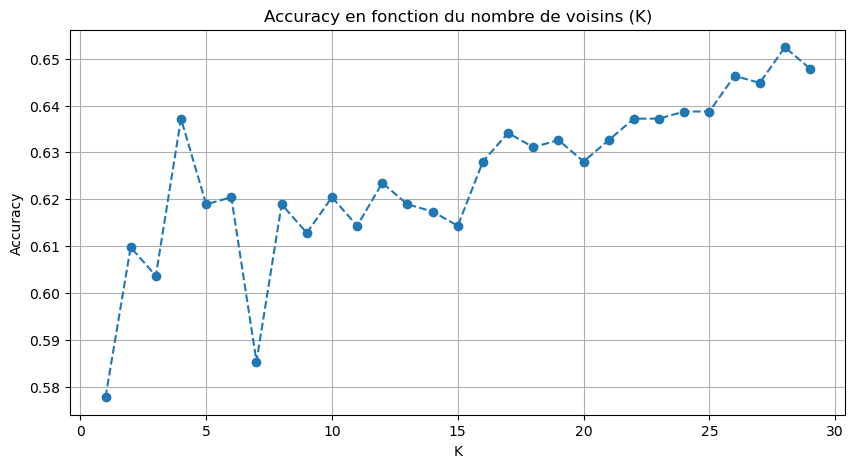

 Meilleur K = 28

 KNN Euclidien
              precision    recall  f1-score   support

           0       0.64      0.96      0.77       400
           1       0.74      0.17      0.27       256

    accuracy                           0.65       656
   macro avg       0.69      0.57      0.52       656
weighted avg       0.68      0.65      0.58       656



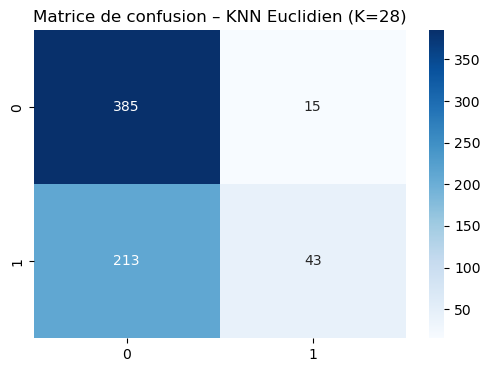


 KNN Pondéré (distance)
              precision    recall  f1-score   support

           0       0.65      0.94      0.76       400
           1       0.67      0.20      0.30       256

    accuracy                           0.65       656
   macro avg       0.66      0.57      0.53       656
weighted avg       0.65      0.65      0.58       656



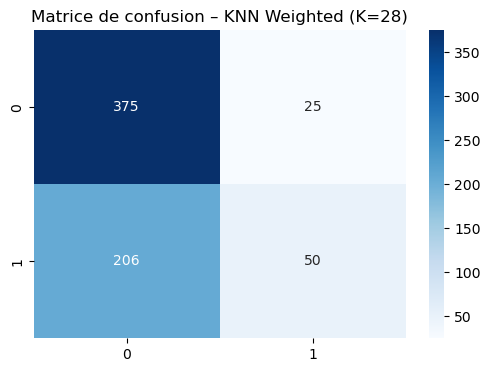

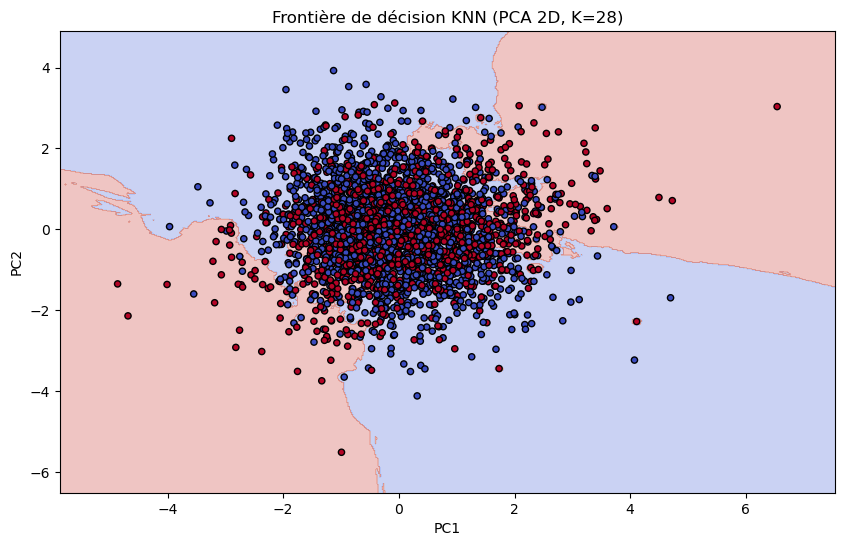

In [21]:


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# ======================================================================
#                    🔹 1) CHOIX DU MEILLEUR K
# ======================================================================

print("1) Optimisation de K pour KNN")

k_values = range(1, 30)
k_scores = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_temp.fit(X_train, y_train)
    k_scores.append(knn_temp.score(X_test, y_test))

# Graphique choix K
plt.figure(figsize=(10,5))
plt.plot(k_values, k_scores, marker='o', linestyle='--')
plt.title("Accuracy en fonction du nombre de voisins (K)")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.savefig("../results/graphs/knn_best_k.png", dpi=300)
plt.show()

best_k = k_values[np.argmax(k_scores)]
print(f" Meilleur K = {best_k}")

# ======================================================================
#           🔹 2) KNN EUCLIDIEN (metric='euclidean')
# ======================================================================

knn_euc = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn_euc.fit(X_train, y_train)
y_pred_euc = knn_euc.predict(X_test)

print("\n KNN Euclidien")
print(classification_report(y_test, y_pred_euc))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_euc), annot=True, fmt='d', cmap='Blues')
plt.title(f"Matrice de confusion – KNN Euclidien (K={best_k})")
plt.savefig("../results/graphs/confusion_knn_euclidienne.png", dpi=300)
plt.show()

# ======================================================================
#           🔹 3) KNN PONDÉRÉ (weights='distance') weighted knn  le plus proche voisin prend plus de poids , plus dimportance 
# ======================================================================

knn_weighted = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean', weights='distance')
knn_weighted.fit(X_train, y_train)
y_pred_weighted = knn_weighted.predict(X_test)

print("\n KNN Pondéré (distance) weighted knn ")
print(classification_report(y_test, y_pred_weighted))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_weighted), annot=True, fmt='d', cmap='Blues')
plt.title(f"Matrice de confusion – KNN Weighted (K={best_k})")
plt.savefig("../results/graphs/confusion_knn_weighted.png", dpi=300)
plt.show()

# ======================================================================
#           🔹 4) PCA + FRONTIÈRE DE DÉCISION 
# ======================================================================

# PCA vers 2 dimensions
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(StandardScaler().fit_transform(X))

# KNN sur PCA
knn_pca = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean', weights='distance')
knn_pca.fit(X_reduced, y)

# Meshgrid pour dessiner la frontière
x_min, x_max = X_reduced[:,0].min() - 1, X_reduced[:,0].max() + 1
y_min, y_max = X_reduced[:,1].min() - 1, X_reduced[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y, s=20, cmap='coolwarm', edgecolor='k')
plt.title(f"Frontière de décision KNN (PCA 2D, K={best_k})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig("../results/graphs/knn_pca_decision_boundary.png", dpi=300)
plt.show()



Meilleurs hyperparamètres SVM : {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Métriques SVM :
Accuracy : 0.6707317073170732
Precision: 0.7040816326530612
Recall   : 0.26953125
F1-Score : 0.3898305084745763

Classification Report :
              precision    recall  f1-score   support

           0       0.66      0.93      0.77       400
           1       0.70      0.27      0.39       256

    accuracy                           0.67       656
   macro avg       0.68      0.60      0.58       656
weighted avg       0.68      0.67      0.62       656



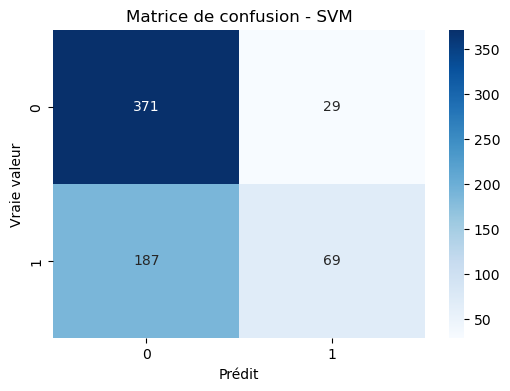

In [5]:
# ===========================
# Partie 4 : SVM
# ===========================

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Définir les hyperparamètres à tester
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Créer le modèle SVM
svm_model = SVC(random_state=42)

# GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Meilleurs paramètres
print("Meilleurs hyperparamètres SVM :", grid_search.best_params_)

# Prédiction sur le jeu de test
y_pred_svm = grid_search.predict(X_test)

# Métriques de performance
print("\nMétriques SVM :")
print("Accuracy :", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall   :", recall_score(y_test, y_pred_svm))
print("F1-Score :", f1_score(y_test, y_pred_svm))

# Rapport complet
print("\nClassification Report :")
print(classification_report(y_test, y_pred_svm))

# Matrice de confusion
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - SVM")
plt.xlabel("Prédit")
plt.ylabel("Vraie valeur")
plt.show()


Répartition des classes avant SMOTE :
Potability
0    1598
1    1022
Name: count, dtype: int64

Répartition des classes après SMOTE :
Potability
0    1598
1    1598
Name: count, dtype: int64

Métriques SVM après SMOTE :
Accuracy : 0.6204268292682927
Precision: 0.5130111524163569
Recall   : 0.5390625
F1-Score : 0.5257142857142857

Classification Report après SMOTE :
              precision    recall  f1-score   support

           0       0.70      0.67      0.68       400
           1       0.51      0.54      0.53       256

    accuracy                           0.62       656
   macro avg       0.60      0.61      0.60       656
weighted avg       0.62      0.62      0.62       656



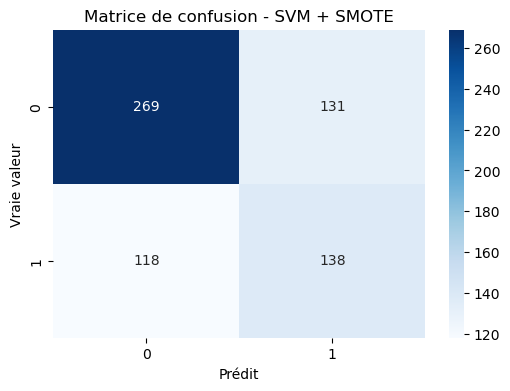

In [6]:
# ===========================
# Partie 5 : Rééquilibrage avec SMOTE
# ===========================

from imblearn.over_sampling import SMOTE

# Créer l'objet SMOTE
smote = SMOTE(random_state=42)

# Appliquer SMOTE sur le jeu d'entraînement
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Vérifier la répartition après SMOTE
print("Répartition des classes avant SMOTE :")
print(y_train.value_counts())
print("\nRépartition des classes après SMOTE :")
print(pd.Series(y_train_sm).value_counts())

# Réentraînement du SVM avec les mêmes meilleurs hyperparamètres
svm_sm = SVC(C=1, gamma='scale', kernel='rbf', random_state=42)
svm_sm.fit(X_train_sm, y_train_sm)

# Prédiction sur le jeu de test
y_pred_sm = svm_sm.predict(X_test)

# Métriques SVM après SMOTE
print("\nMétriques SVM après SMOTE :")
print("Accuracy :", accuracy_score(y_test, y_pred_sm))
print("Precision:", precision_score(y_test, y_pred_sm))
print("Recall   :", recall_score(y_test, y_pred_sm))
print("F1-Score :", f1_score(y_test, y_pred_sm))

# Rapport complet
print("\nClassification Report après SMOTE :")
print(classification_report(y_test, y_pred_sm))

# Matrice de confusion
cm_svm_sm = confusion_matrix(y_test, y_pred_sm)
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm_sm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - SVM + SMOTE")
plt.xlabel("Prédit")
plt.ylabel("Vraie valeur")
plt.show()

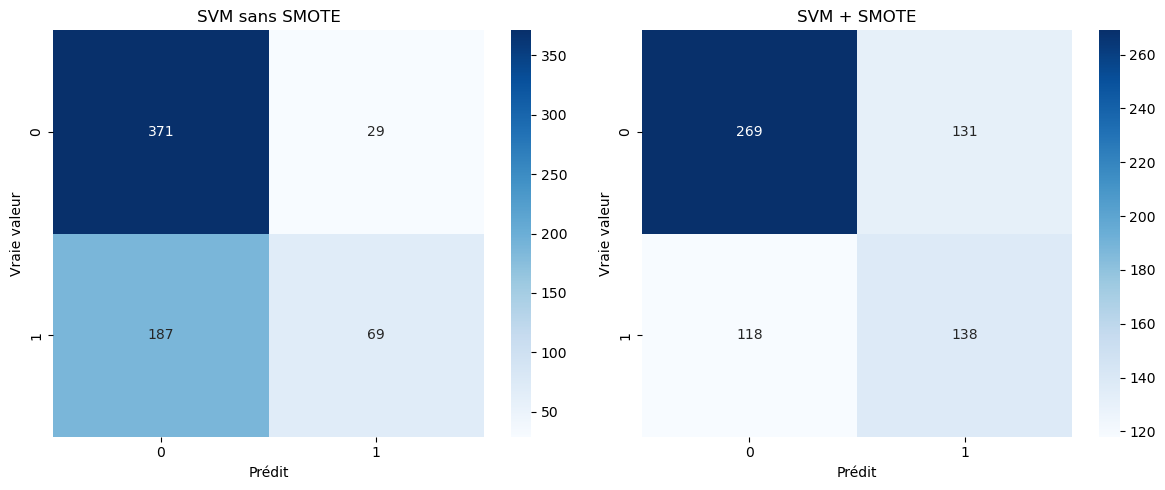

C:\Users\pc\AppData\Local\Temp\ipykernel_14980\2250110937.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()), palette='viridis')


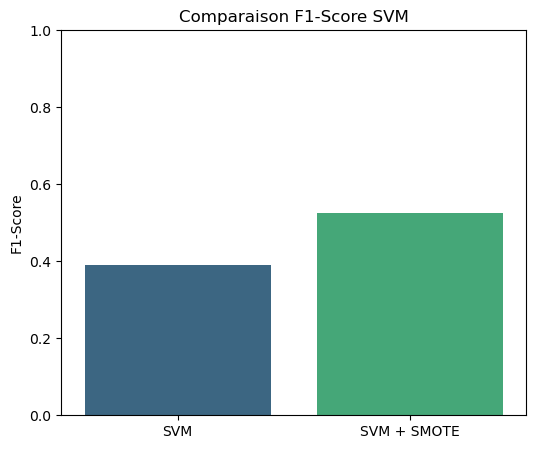

In [7]:
# Comparaison SVM sans et avec SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# SVM sans SMOTE
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("SVM sans SMOTE")
axes[0].set_xlabel("Prédit")
axes[0].set_ylabel("Vraie valeur")

# SVM avec SMOTE
sns.heatmap(confusion_matrix(y_test, y_pred_sm), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("SVM + SMOTE")
axes[1].set_xlabel("Prédit")
axes[1].set_ylabel("Vraie valeur")

plt.tight_layout()
plt.savefig("../results/graphs/comparaison_matrices_confusion_svm.png", dpi=300, bbox_inches='tight')
plt.show()

# Bar plot F1-score pour SVM
f1_scores = {
    'SVM': f1_score(y_test, y_pred_svm),
    'SVM + SMOTE': f1_score(y_test, y_pred_sm)
}  

plt.figure(figsize=(6,5))
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()), palette='viridis')
plt.ylabel("F1-Score")
plt.title("Comparaison F1-Score SVM")
plt.ylim(0,1)
plt.savefig("../results/graphs/comparaison_f1score_svm.png", dpi=300, bbox_inches='tight')
plt.show()


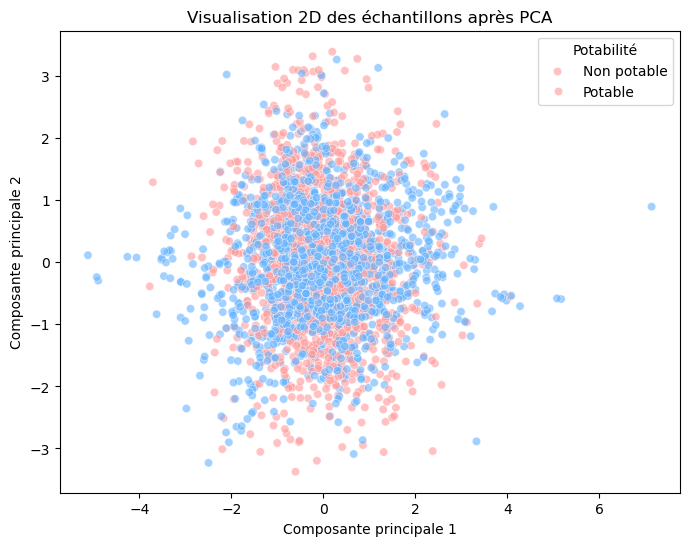

In [8]:
# ===========================
# Partie 6 : Visualisation 2D avec PCA
# ===========================
from sklearn.decomposition import PCA

# Réduction de dimension à 2D
pca = PCA(n_components=2, random_state=42)
X_train_2d = pca.fit_transform(X_train_sm)  # utiliser le jeu entraîné après SMOTE
X_test_2d = pca.transform(X_test)

# Création d'un DataFrame pour visualisation
df_train_2d = pd.DataFrame(X_train_2d, columns=['PC1', 'PC2'])
df_train_2d['Potability'] = y_train_sm.values

df_test_2d = pd.DataFrame(X_test_2d, columns=['PC1', 'PC2'])
df_test_2d['Potability'] = y_test.values

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1', y='PC2', 
    hue='Potability', 
    data=df_train_2d, 
    palette={0:'#ff9999', 1:'#66b3ff'},
    alpha=0.6
)
plt.title("Visualisation 2D des échantillons après PCA")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title='Potabilité', labels=['Non potable', 'Potable'])
plt.savefig("../results/graphs/visualisation_2d_pca.png", dpi=300, bbox_inches='tight')
plt.show()


In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# ANN Model
def build_classifier(input_dim):
    model = models.Sequential([
        layers.Dense(32, activation='relu', input_shape=(input_dim,)),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')   # Sigmoid = binary classification
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

model = build_classifier(X_train.shape[1])
model.summary()

# EarlyStopping to prevent overfitting
es = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Training
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[es],
    verbose=1
)

# Evaluation
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n🔹 Test Accuracy = {acc:.4f}")
print(f"🔹 Test Loss = {loss:.4f}")


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 865 (3.38 KB)

 Trainable params: 865 (3.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5821 - loss: 0.6843 - val_accuracy: 0.6088 - val_loss: 0.6721
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6126 - loss: 0.6678 - val_accuracy: 0.6069 - val_loss: 0.6648
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6159 - loss: 0.6577 - val_accuracy: 0.6145 - val_loss: 0.6585
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6260 - loss: 0.6482 - val_accuracy: 0.6202 - val_loss: 0.6520
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6374 - loss: 0.6373 - val_accuracy: 0.6221 - val_loss: 0.6452
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6570 - loss: 0.6251 - val_accuracy: 0.6279 - val_loss: 0.6389
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6670 - loss: 0.6135 - val_accuracy: 0.6412 - val_loss: 0.6332
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6803 - loss: 0.6032 - val_accuracy: 0.6565 - val_loss:

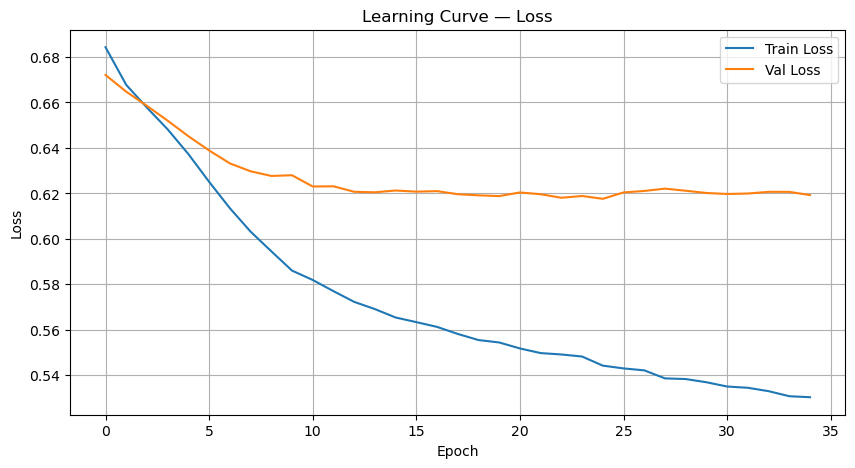

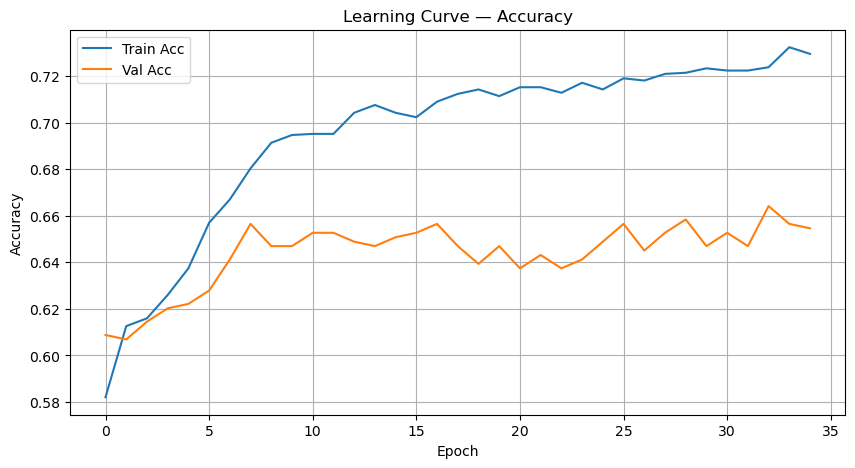

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Learning Curve — Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Learning Curve — Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [22]:

# ÉTAPE 4: VISUALISATION ET ANALYSE PCA (Principal Component Analysis)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np





In [23]:
# SECTION 1: PCA 2D - Réduire à 2 dimensions    icici pour voir les données en 2d 

# On crée un objet PCA qui va réduire les 10 features à 2 composantes principales
pca_2d = PCA(n_components=2)  # n_components=2 → on garde 2 dimensions
# fit_transform fait deux choses:  1. fit() : PCA apprend les axes principaux à partir de X_train  2. transform() : applique cette transformation à X_train
# apres on aura  X_train_pca2d = données transformées en 2D
X_train_pca2d = pca_2d.fit_transform(X_train)  # X_train = données normalisées
X_test_pca2d = pca_2d.transform(X_test)
# Afficher combien de variance on a conservé
print(f"\nVariance expliquée par PC1: {pca_2d.explained_variance_ratio_[0]:.2%}") # explained_variance_ratio_ = pourcentage de variance expliquée par chaque composante
print(f"Variance expliquée par PC2: {pca_2d.explained_variance_ratio_[1]:.2%}")
print(f"Total variance conservée: {pca_2d.explained_variance_ratio_.sum():.2%}")




Variance expliquée par PC1: 13.72%
Variance expliquée par PC2: 12.48%
Total variance conservée: 26.20%


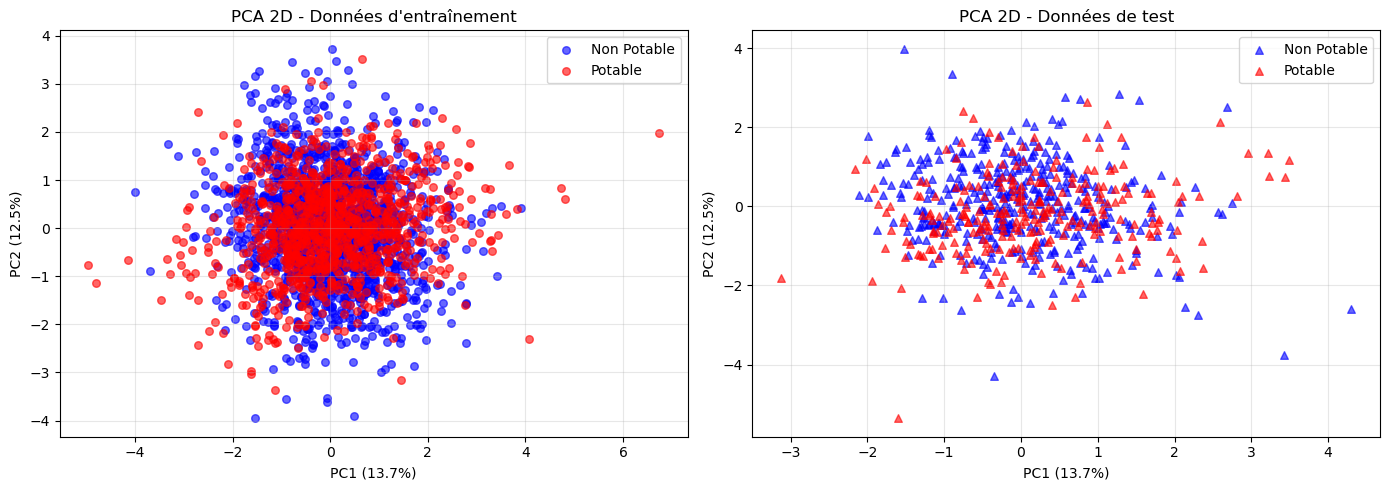

In [24]:
# --- GRAPHIQUE 1: Visualisation PCA 2D ---

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# SOUS-GRAPHIQUE 1: Données d'entraînement
axes[0].scatter(X_train_pca2d[y_train == 0, 0], X_train_pca2d[y_train == 0, 1],  c='blue', label='Non Potable', alpha=0.6, s=30)
axes[0].scatter(X_train_pca2d[y_train == 1, 0], X_train_pca2d[y_train == 1, 1],   c='red', label='Potable', alpha=0.6, s=30)
axes[0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%})')
axes[0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%})')
axes[0].set_title('PCA 2D - Données d\'entraînement')
axes[0].legend()
axes[0].grid(True, alpha=0.3) 

# SOUS-GRAPHIQUE 2: Données de test

axes[1].scatter(X_test_pca2d[y_test == 0, 0], X_test_pca2d[y_test == 0, 1],   c='blue', label='Non Potable', alpha=0.6, s=30, marker='^')
axes[1].scatter(X_test_pca2d[y_test == 1, 0], X_test_pca2d[y_test == 1, 1],   c='red', label='Potable', alpha=0.6, s=30, marker='^')
axes[1].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%})')
axes[1].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%})')
axes[1].set_title('PCA 2D - Données de test')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()  
plt.savefig("../results/graphs/pca_2d_visualization.png", dpi=300, bbox_inches='tight')
plt.show()



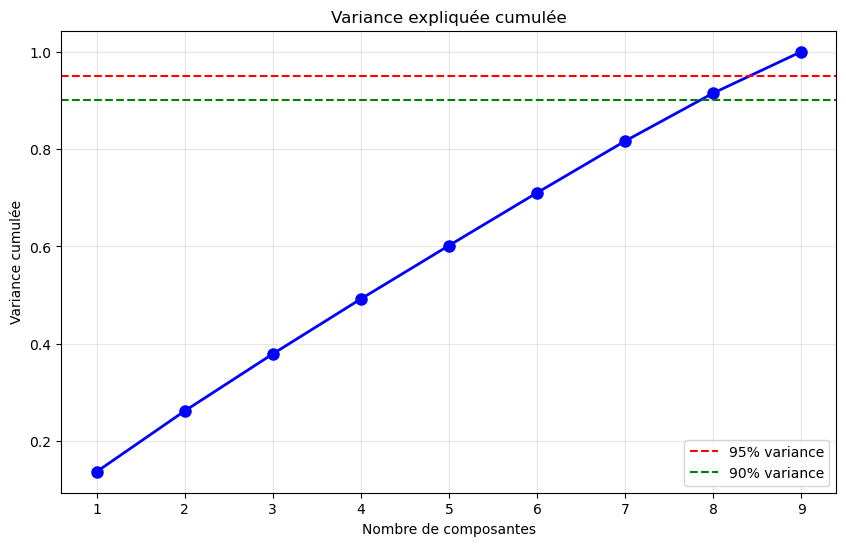

Variance expliquée par 8 composants : 91.49%


In [25]:
# SECTION 2: Variance cumulée   hanya bch n3rfou ch7el men dimensions on a vraiement besoin  dapres l results l9ina blik il faut 8 composants bch tkon la variance 95% while 3d ta3na capte ghir 37%

# On calcule PCA avec TOUS les composantes  pour voir la variance
pca_all = PCA()  # Sans n components  on prend tt
pca_all.fit(X_train)

# Calculer la variance CUMULÉE
cumsum_var = np.cumsum(pca_all.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
# Line plot:  la variance cumulée en fonction du nbr de composantes
plt.plot(range(1, len(cumsum_var) + 1), cumsum_var, 'bo-', linewidth=2, markersize=8)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')  # Seuil 95%  hna si 95% de variance lah9olha b 3 composants donc we use 3d bla mandirou 10d
plt.axhline(y=0.90, color='g', linestyle='--', label='90% variance')  # Seuil 90%
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance cumulée')
plt.title('Variance expliquée cumulée')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(1, len(cumsum_var) + 1))
plt.savefig("../results/graphs/pca_cumulative_variance.png", dpi=300, bbox_inches='tight')
plt.show()

pca_8d = PCA(n_components=8)  # voila han ki drna 8d khrjet 91% mais maheuresement we couldnt see that 
pca_8d.fit(X_train)
print(f"Variance expliquée par 8 composants : {pca_8d.explained_variance_ratio_.sum():.2%}")






Variance expliquée par 3 composantes: 37.91%


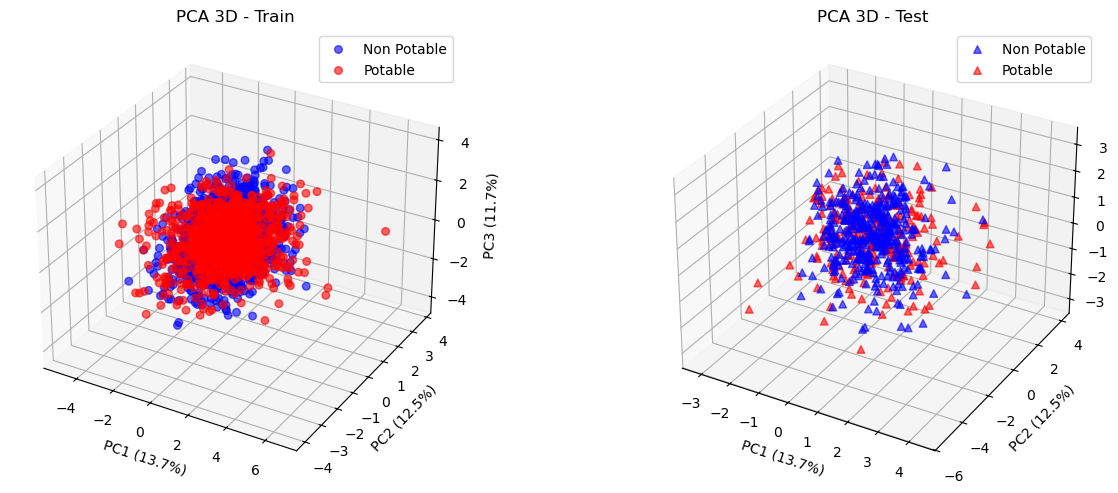

In [26]:
# SECTION 3: PCA 3D - Visualisation en 3 dimensions    3d pour plus dinfos que 2d 

#  PCA avec 3 composantes
pca_3d = PCA(n_components=3)  # Cette fois on prend 3 dimensions
X_train_pca3d = pca_3d.fit_transform(X_train)  # 10D  l 3D
X_test_pca3d = pca_3d.transform(X_test)
print(f"\nVariance expliquée par 3 composantes: {pca_3d.explained_variance_ratio_.sum():.2%}")
fig = plt.figure(figsize=(14, 5))

#  1: Données d'entraînement en 3D
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_train_pca3d[y_train == 0, 0], X_train_pca3d[y_train == 0, 1], X_train_pca3d[y_train == 0, 2], c='blue', label='Non Potable', alpha=0.6, s=30)
ax1.scatter(X_train_pca3d[y_train == 1, 0], X_train_pca3d[y_train == 1, 1], X_train_pca3d[y_train == 1, 2], c='red', label='Potable', alpha=0.6, s=30)
ax1.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.1%})')
ax1.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.1%})')
ax1.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.1%})')
ax1.set_title('PCA 3D - Train')
ax1.legend()

# 2: Données de test en 3D
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_test_pca3d[y_test == 0, 0], X_test_pca3d[y_test == 0, 1], X_test_pca3d[y_test == 0, 2], c='blue', label='Non Potable', alpha=0.6, s=30, marker='^')
ax2.scatter(X_test_pca3d[y_test == 1, 0], X_test_pca3d[y_test == 1, 1], X_test_pca3d[y_test == 1, 2],c='red', label='Potable', alpha=0.6, s=30, marker='^')
ax2.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.1%})')
ax2.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.1%})')
ax2.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.1%})')
ax2.set_title('PCA 3D - Test')
ax2.legend()

plt.tight_layout()
plt.savefig("../results/graphs/pca_3d_visualization.png", dpi=300, bbox_inches='tight')
plt.show()




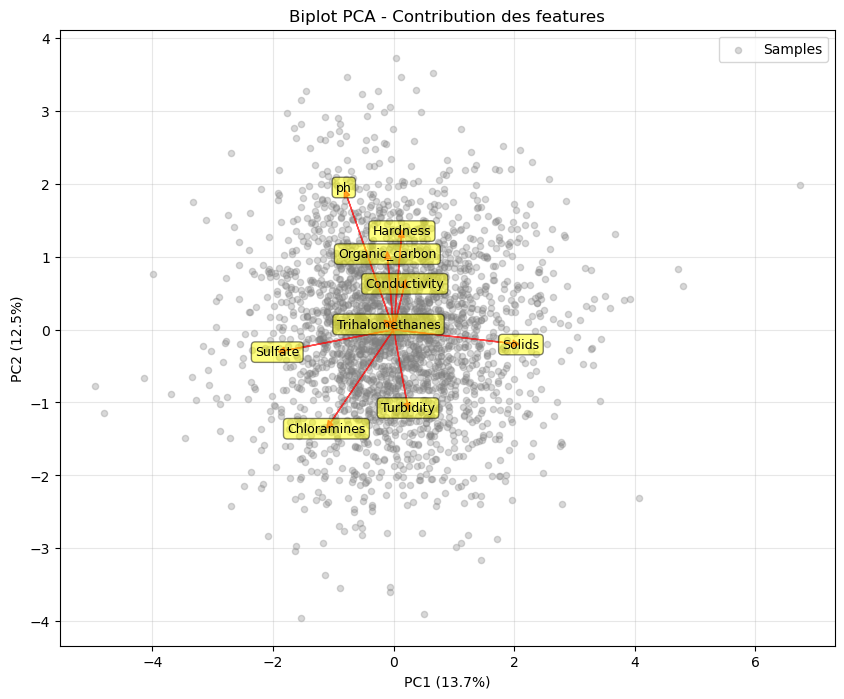

In [27]:
# SECTION 4: Biplot - Voir la contribution des features

# Les components homa les vecteurs  direction de chaque composante donc Les flèches longues = features importantes, flèches courtes = features moins importantes!
components = pca_2d.components_
feature_names = X.columns  # les noms de features

plt.figure(figsize=(10, 8))
plt.scatter(X_train_pca2d[:, 0], X_train_pca2d[:, 1],  alpha=0.3, s=20, c='gray', label='Samples')
for i, feature in enumerate(feature_names):
    plt.arrow(0, 0, components[0, i]*3, components[1, i]*3, head_width=0.1, head_length=0.1, fc='red', ec='red', alpha=0.7)
    plt.text(components[0, i]*3.2, components[1, i]*3.2, feature, fontsize=9, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%})')
plt.title('Biplot PCA - Contribution des features')
plt.grid(True, alpha=0.3)
plt.legend()

plt.savefig("../results/graphs/pca_biplot.png", dpi=300, bbox_inches='tight')
plt.show()